<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/Statistics_in_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Measures of center**

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

44.65
14.58


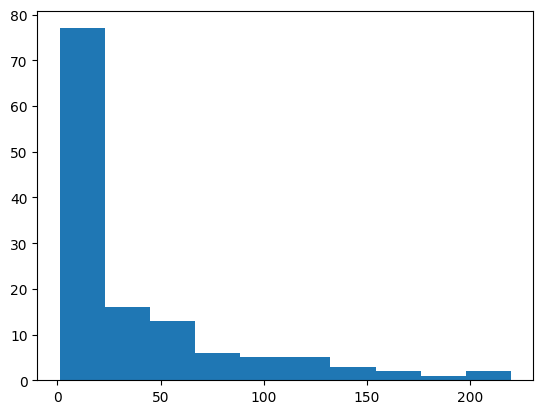


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64



In [14]:
# Mean and median

# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean consumption in USA
print(f"{np.mean(usa_consumption['consumption']):.2f}")

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

# MEAN AND MEDIAN VALUES ARE QUIET DIFFERENT. WE HAVE TO UNDERSTAND BETTER THE DATA

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()
print()

# THE CHART SHOWS THAT DATA IS NOT EQUALY DISTRIBUTED, THAT IS WHY MEAN AND MEDIAN ARE SO DIFFERENT.

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))
print()

# **Measures of spread**

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.

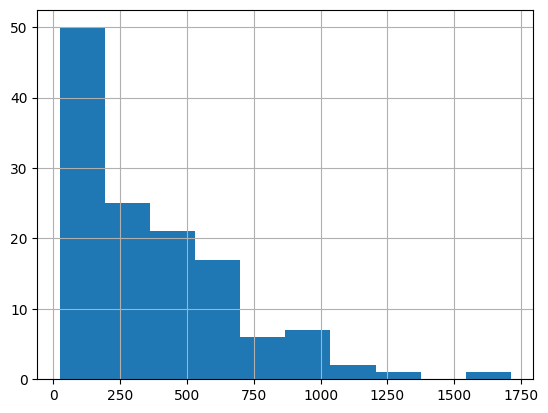

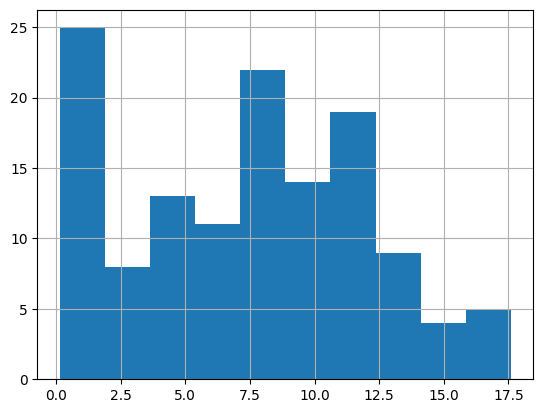

In [1]:
# Variance and standard deviation

# IMPORTING PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# IN THE CODE ABOVE, DATA IS GROUPED BY FOOD CATEGORY AND THEN VALUES OF VAR AND STD ARE PROVIDED TO CO2 EMISSIONS DATA FOR EACH GROUP

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

# THE DISTRIBUTION PLOT SHOWS THAT DATA FROM BEEF IS SKEWED WHILE THE DATA FROM EGGS IS BETTER SPREAD.

# **Quartiles, quantiles, and quintiles**

In [9]:
# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# QUARTILES SPLIT THE DATASET INTO 4 PIECES

# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))
print()
# [   0.        5.21     16.53     62.5975 1712.    ]
# THE RESULT SHOWS THAT 25% OF THE DATA IS BELOW 5.21
# HALF OF DATA IS BELOW AND ALSO ABOVE 16.53, WHICH IS ALSO THE MEDIAN

print(np.median(food_consumption['co2_emission']))
print()

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))
print()

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.1, 0.2, 0.3, 0.4,
                                                     0.5, 0.6, 0.7, 0.8,
                                                     0.9, 1]))
print()

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

[   0.        5.21     16.53     62.5975 1712.    ]

16.53

[   0.       3.54    11.026   25.59    99.978 1712.   ]

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]



# **Finding outliers using IQR**

In [10]:
# OUTLIER CALCULATION USING IQR AND BOXPLOT
# IMPORTING PACKAGES

import pandas as pd
import numpy as np

# READING FILES

path = '/content/drive/MyDrive/Colab Notebooks/Statistics in Py/food_consumption.csv'

food_consumption = pd.read_csv(path)

# KNOW YOUR DATA

print(food_consumption.head(10))
print()

# MANIPULATING DATA

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)

print(emissions_by_country)

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = ____
upper = ____

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
5           6  Argentina          eggs        11.39         10.46
6           7  Argentina         dairy       195.08        277.87
7           8  Argentina         wheat       103.11         19.66
8           9  Argentina          rice         8.77         11.22
9          10  Argentina      soybeans         0.00          0.00

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, d

<ipython-input-10-8b3c722e09bb>:20: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)
